d:\dev\pipelines\data\segmentate_5s.dill


  0%|          | 0/316 [00:00<?, ?it/s]

('Laufen', 'Ben_Tran', '2e0811b1e42d4de18cf4770760e433c2')
29
(251, 13)
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z', 'activity', 'hash', 'person', 'segment_id'],
      dtype='object')
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z'],
      dtype='object')
(51,) (7,) (51, 7)


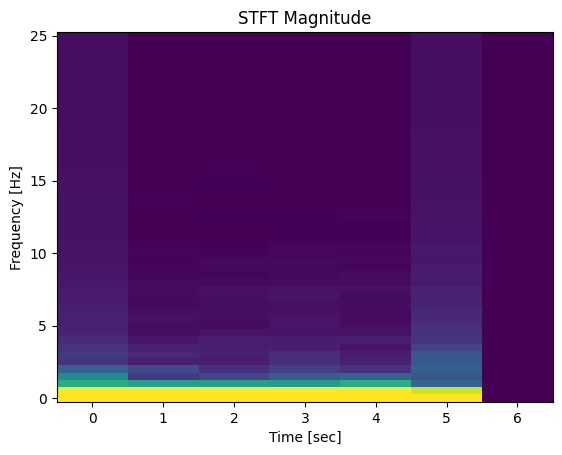

  0%|          | 1/316 [00:00<00:42,  7.49it/s]

('Laufen', 'Ben_Tran', '6d2a7066b92f41fd98bf237c8c9347d1')
8
(251, 13)
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z', 'activity', 'hash', 'person', 'segment_id'],
      dtype='object')
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z'],
      dtype='object')
(51,) (7,) (51, 7)


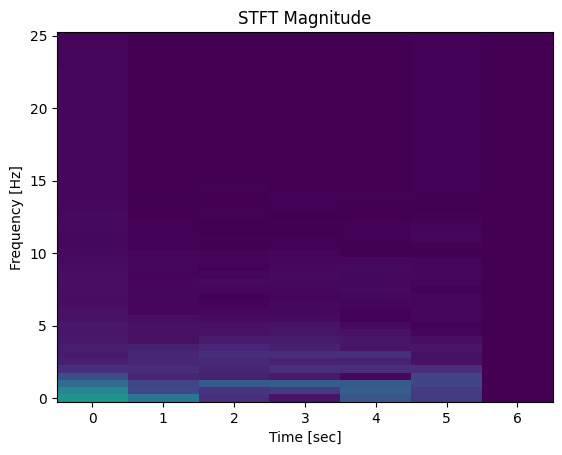

  1%|          | 2/316 [00:00<00:41,  7.50it/s]

('Laufen', 'Ben_Tran', '813733c9a1b54e7598404bab3e4e8afd')
28
(251, 13)
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z', 'activity', 'hash', 'person', 'segment_id'],
      dtype='object')
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z'],
      dtype='object')
(51,) (7,) (51, 7)


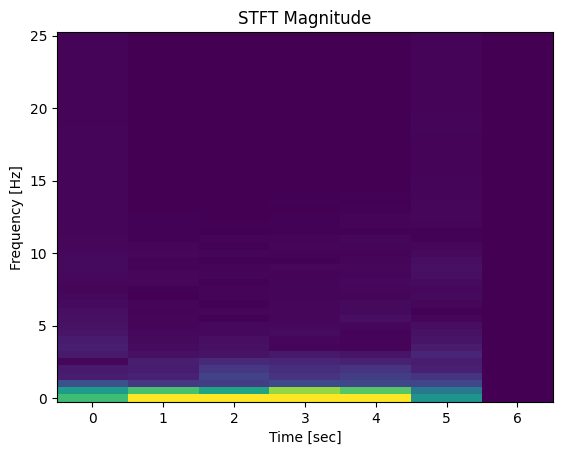

  1%|          | 3/316 [00:00<00:43,  7.17it/s]

('Laufen', 'Ben_Tran', '8b122ec320b645fb9a9bceb1eb7101c1')
15
(251, 13)
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z', 'activity', 'hash', 'person', 'segment_id'],
      dtype='object')
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z'],
      dtype='object')
(51,) (7,) (51, 7)


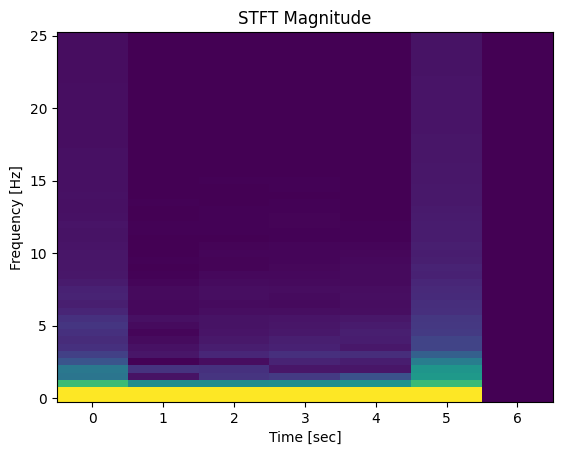

  1%|▏         | 4/316 [00:00<00:41,  7.45it/s]

('Laufen', 'Ben_Tran', 'ae55992d294c4c79b62f14f90db69a9e')
15
(251, 13)
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z', 'activity', 'hash', 'person', 'segment_id'],
      dtype='object')
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z'],
      dtype='object')
(51,) (7,) (51, 7)


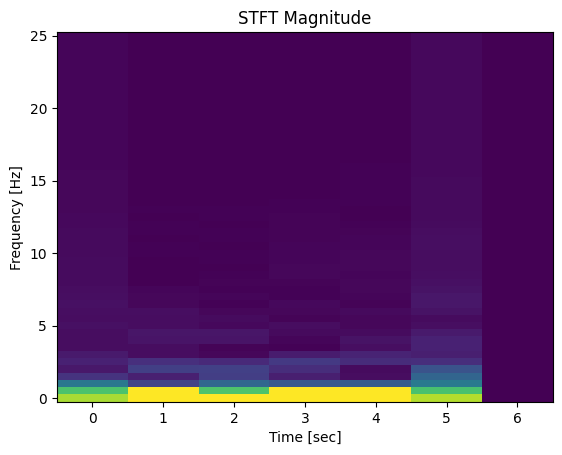

  2%|▏         | 5/316 [00:00<00:41,  7.57it/s]

('Laufen', 'Ben_Tran', 'd3842f39eb86423d92e77aeba4d8695e')
13
(251, 13)
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z', 'activity', 'hash', 'person', 'segment_id'],
      dtype='object')
Index(['Accelerometer_x', 'Accelerometer_y', 'Accelerometer_z', 'Gyroscope_x',
       'Gyroscope_y', 'Gyroscope_z', 'Magnetometer_x', 'Magnetometer_y',
       'Magnetometer_z'],
      dtype='object')
(51,) (7,) (51, 7)


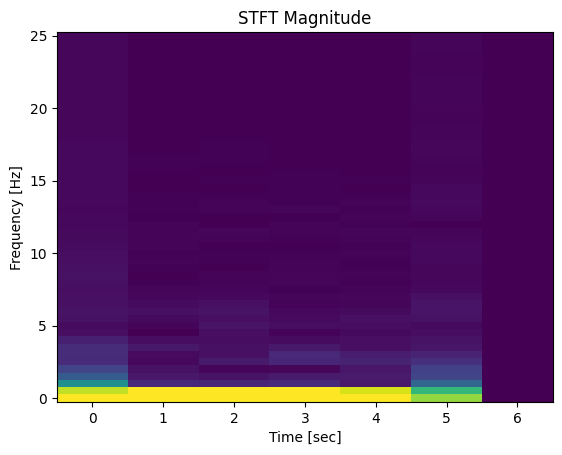

  2%|▏         | 5/316 [00:00<00:49,  6.29it/s]


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dill import load, dump
from scipy.signal import stft

from tqdm import tqdm
# get absolute path of "data/segmentate_5s.dill"
import os 
path = os.path.abspath("../data/segmentate_5s.dill")
print(path)

# read data/segmentate_5s.dill
i = 0
with open("../data/segmentate_5s.dill", "rb") as fr:
    for key, segments in tqdm(load(fr).items()):
        print(key)
        print(len(segments))
        print(segments[0].shape)
        print(segments[0].columns)
        # print only numeric columns
        print(segments[0].select_dtypes(include=np.number).columns)
        #print(segments[0].iloc[:, 0])
        # apply stft
        f, t, Zxx = stft(segments[0].iloc[:, 0], fs=50, nperseg=100)
        print(f.shape, t.shape, Zxx.shape)
        # create spectrogram
        plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1)
        # log scale
        plt.title('STFT Magnitude')
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.show()
        i += 1
        # break
        if i > 5:
            break